# Example for 'custom' LED spectrum and custom constellation


## Define transmitter, receiver and indoor space



 List of parameters for indoor envirionment Matisse-CornellBox: 
Name: Matisse-CornellBox
Size [x y z] -> [m]: [5.0000e+02 5.0000e+02 5.0000e+02] 
Order reflection: 10 
Resolution points [m]: 0.10000000149011612
Smaller Area [m^2]: Non defined, create grid.
Number of points: Non defined, create grid.


 List of parameters for LED transmitter: 
Name: Led1
Position [x y z]: [2.5000e+02 4.9500e+02 2.5000e+02] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 -1.0000e+00]] 
Lambert Number: 1.2999999523162842 
Central Wavelengths [nm]: [6.2000e+02 5.3000e+02 4.7500e+02] 
FWHM [nm]: [2.0000e+01 3.0000e+01 2.0000e+01]
Luminous Flux [lm]: 50.0
Correlated Color Temperature: [[-4.3902e+06]]
CIExy coordinates: [[2.3633e-01 1.9580e-01 5.6787e-01]]
ILER [W/lm]: 
 [[3.8001e-03 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.8197e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.1960e-02]] 
Average Power per Channel Color: 
 [1.2667e-03 6.0655e-04 3.9868e-03] 
Total Power emmited by the Transmitter [W]: 
 0.29300327676

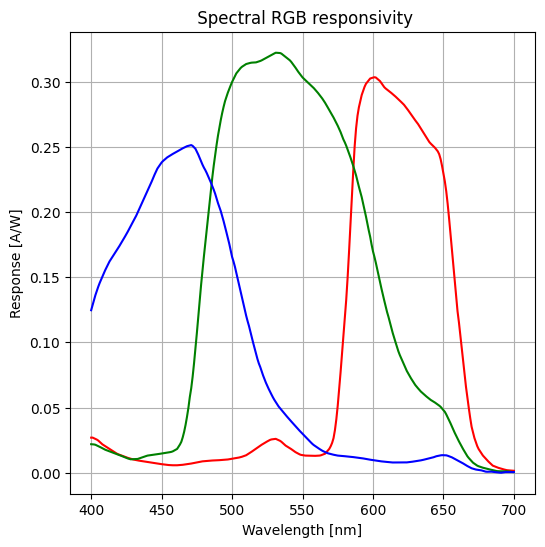

Rendering with RGB Linear ...


INFO:root:image_H_rgblinear matrix shape: (200, 300, 3)
INFO:root:image H rgblinear matrix:
 [[[0.0000e+00 1.4889e-03 0.0000e+00]
  [0.0000e+00 2.2633e-02 0.0000e+00]
  [0.0000e+00 1.3102e-03 0.0000e+00]
  ...
  [1.3555e-02 0.0000e+00 0.0000e+00]
  [4.4709e-02 0.0000e+00 0.0000e+00]
  [1.4634e-02 0.0000e+00 0.0000e+00]]

 [[0.0000e+00 2.4155e-02 0.0000e+00]
  [0.0000e+00 4.6147e-03 0.0000e+00]
  [0.0000e+00 2.2443e-02 0.0000e+00]
  ...
  [1.2463e-03 0.0000e+00 0.0000e+00]
  [1.4155e-02 0.0000e+00 0.0000e+00]
  [1.3967e-03 0.0000e+00 0.0000e+00]]

 [[0.0000e+00 1.5842e-03 0.0000e+00]
  [0.0000e+00 2.3394e-02 0.0000e+00]
  [0.0000e+00 1.4770e-03 0.0000e+00]
  ...
  [1.4155e-02 0.0000e+00 0.0000e+00]
  [4.6140e-02 0.0000e+00 0.0000e+00]
  [1.5474e-02 0.0000e+00 0.0000e+00]]

 ...

 [[0.0000e+00 2.4345e-02 0.0000e+00]
  [0.0000e+00 5.0561e-03 0.0000e+00]
  [0.0000e+00 2.3965e-02 0.0000e+00]
  ...
  [1.3430e-03 0.0000e+00 0.0000e+00]
  [1.5114e-02 0.0000e+00 0.0000e+00]
  [1.3645e-03 0.0000

Get ray color result: (3, 60000)
Render Took 1587.4308626651764
Computing crosstalk ... 
Crosstalk matrix:
 [[3.5767e-04 1.1911e-05 3.1334e-05]
 [1.1995e-04 1.9020e-04 4.7756e-04]
 [1.0744e-05 4.0128e-05 9.4508e-04]]


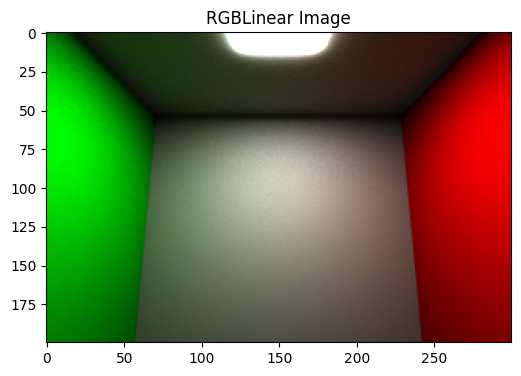

INFO:root:Crosstalk+RGBLinear Image: [[[0.0000e+00 1.4889e-03 0.0000e+00]
  [0.0000e+00 2.2633e-02 0.0000e+00]
  [0.0000e+00 1.3102e-03 0.0000e+00]
  ...
  [1.3555e-02 0.0000e+00 0.0000e+00]
  [4.4709e-02 0.0000e+00 0.0000e+00]
  [1.4634e-02 0.0000e+00 0.0000e+00]]

 [[0.0000e+00 2.4155e-02 0.0000e+00]
  [0.0000e+00 4.6147e-03 0.0000e+00]
  [0.0000e+00 2.2443e-02 0.0000e+00]
  ...
  [1.2463e-03 0.0000e+00 0.0000e+00]
  [1.4155e-02 0.0000e+00 0.0000e+00]
  [1.3967e-03 0.0000e+00 0.0000e+00]]

 [[0.0000e+00 1.5842e-03 0.0000e+00]
  [0.0000e+00 2.3394e-02 0.0000e+00]
  [0.0000e+00 1.4770e-03 0.0000e+00]
  ...
  [1.4155e-02 0.0000e+00 0.0000e+00]
  [4.6140e-02 0.0000e+00 0.0000e+00]
  [1.5474e-02 0.0000e+00 0.0000e+00]]

 ...

 [[0.0000e+00 2.4345e-02 0.0000e+00]
  [0.0000e+00 5.0561e-03 0.0000e+00]
  [0.0000e+00 2.3965e-02 0.0000e+00]
  ...
  [1.3430e-03 0.0000e+00 0.0000e+00]
  [1.5114e-02 0.0000e+00 0.0000e+00]
  [1.3645e-03 0.0000e+00 0.0000e+00]]

 [[0.0000e+00 1.5127e-03 0.0000e+00]


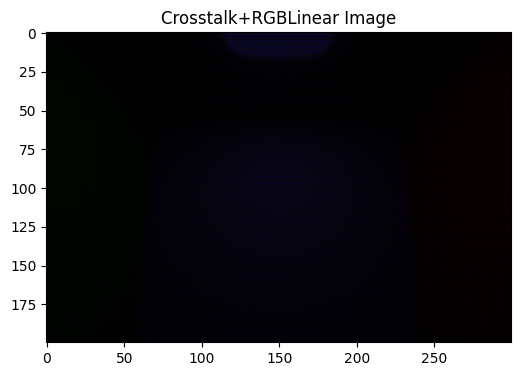

In [1]:
# Import Symbol Constants
from vlc_rolling.constants import Constants as Kt

from vlc_rolling.transmitter import Transmitter

from vlc_rolling.indoorenv import Indoorenv

from vlc_rolling.imagesensor import Imagesensor

from vlc_rolling.rollingshutter import RollingShutter

from vlc_rolling.sightpy import *

# Import numpy
import numpy as np

#Import luxpy   
import luxpy as lx

# Import Matplotlob
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.facecolor']='white'



green_wall = rgb(0.0, 1.0, 0.0)
red_wall = rgb(1.0, 0.0, 0.0)
white_wall = rgb(0.8, 0.8, 0.8)
floor_wall = rgb(0.1, 0.1, 0.1)

# room dimensions in milimeters
WIDTH = 5e2
LENGTH = 5e2
HEIGHT = 5e2

# camera parameters
# CAMERA_CENTER=[]

# Create indoor environment and 3d scene

room = Indoorenv(
    name="Matisse-CornellBox",
    size=[LENGTH, WIDTH, HEIGHT],
    no_reflections=10,
    resolution=1/10,
    ceiling=('diffuse', white_wall),
    west=('diffuse', red_wall),
    north=('diffuse', white_wall),
    east=('diffuse', green_wall),
    south=('diffuse', white_wall),
    floor=('diffuse', floor_wall)
        )
room.create_environment()
print(room)

# Create a transmitter-type object
transmitter = Transmitter(
    room=room,
    name="Led1",
    led_type='gaussian',
    reference='RGB-Phosphor',
    position=[LENGTH/2, HEIGHT*0.99, WIDTH/2],
    normal=[0, 0, -1],
    mlambert=1.3,
    wavelengths=[620, 530, 475],
    fwhm=[20, 30, 20],
    constellation='ieee16',
    frequency=1e4,
    luminous_flux=50    
            )
print(transmitter)

img_sensor = Imagesensor(
    name="Camera",
    focal_length = 1e0,
    pixel_size = 1,
    image_height = 2*100,
    image_width = 3*100,
    camera_center = vec3(WIDTH/2, 0.49*LENGTH, HEIGHT + HEIGHT/20),
    camera_look_at = vec3(WIDTH/2, LENGTH/2, HEIGHT),
    room = room,
    transmitter=transmitter,
    sensor='SonyStarvisBSI'
    )
print(img_sensor)
img_sensor.plot_responsivity()
img_sensor.take_picture(plot='false')
img_sensor.plot_rgblinear_image()
img_sensor.plot_crosstalk_rgblinear_image()


INFO:root:Symbols CSK array shape: (3, 152)
INFO:root:No Symbol:18
INFO:root:Im_crosstalk_rgblinear shape: (200, 300, 3)
INFO:root:Image current shape: [[1.4889e-03 2.2633e-02 1.3102e-03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.2463e-03 1.4155e-02 1.3967e-03]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.4155e-02 4.6140e-02 1.5474e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.3430e-03 1.5114e-02 1.3645e-03]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.4994e-02 4.4352e-02 1.5114e-02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.3430e-03 1.4874e-02 1.3537e-03]]
INFO:root:Maximum value of Bayer image:109.25165813558675
INFO:root:Voltage image: [[1.2655e+00 1.9238e+01 1.1137e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.0594e+00 1.2031e+01 1.1872e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.2031e+01 3.9219e+01 1.3153e+01]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.1416e+00 1.2847e+01 1.1598e+00]
 [0.0000e+00 0.0000e+00 

Current mean:
0.015331368941790055
Variance of noise
8.705743e-23 2.5987685370429135e-16


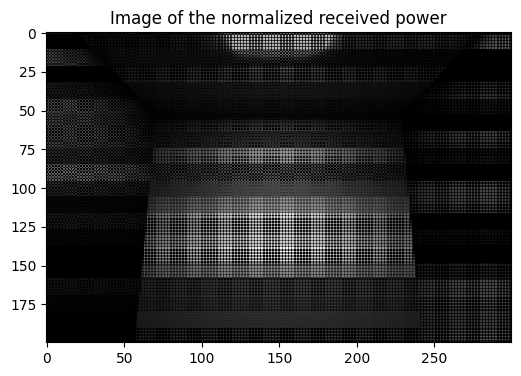

INFO:root:RGB image: [[[ 1  5  0]
  [ 1  5  0]
  [ 1  0  0]
  ...
  [19  9  1]
  [20 12  1]
  [20 12  1]]

 [[ 1  5  0]
  [ 1  5  0]
  [ 1  0  0]
  ...
  [19  9  1]
  [20 12  1]
  [20 12  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [37 12  1]
  [39 13  1]
  [39 13  1]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [38 12  1]
  [38 12  1]
  [38 12  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [37 12  1]
  [37 12  1]
  [37 12  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [37 12  1]
  [37 12  1]
  [37 12  1]]]


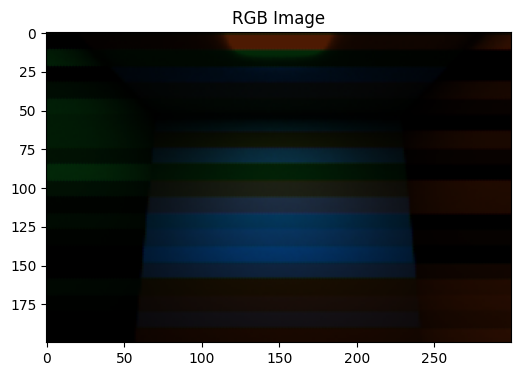

Adding blur effect ...


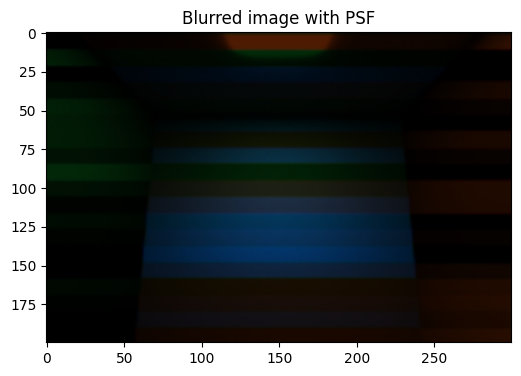

In [ ]:
transmitter._frequency = 10000
rollingshutter = RollingShutter(
    name="rs",
    t_exposure=85e-6,
    t_rowshift=18.904e-6,
    t_offset=0,
    iso=200,    
    adc_resolution=8,
    gain_pixel=1e8,
    temperature=298,
    idark=1e-11,
    transmitter=transmitter,
    imagesensor=img_sensor
)

rollingshutter.plot_current_image()
rollingshutter.plot_color_image()
rollingshutter.add_blur(size=7, center=3.5, sigma=0.5)
rollingshutter.plot_blurred_image()